# Analiza podatkov rabljenih plovil

V tem besedilu so analizirani podatki rabljenih plovil, ki so bili zajeti na spletni strani [Boat24](https://www.boat24.com/en/) in obdelani s pomočjo Pythona in Jupyter Notebooka.

## Uvod

**Vodno plovilo** je izraz v slovenščini, ki se nanaša na plovilo ali vozilo, ki se premika po vodni površini, kot so reke, jezera, morja in kanali. To vključuje različne vrste plovil, kot so ladje, čolni, jadrnice, podmornice, kajaki, kanuji in druga plovila. Vodna plovila se uporabljajo za prevoz ljudi, tovora, vojske, raziskovanje, turizem, šport in druge namene.

V tej analizi se bom posvetili predvsem plovilom za osebno rabo, ki za svoj pogon uporabljajo pretežno jadra in motor in so na prodaj v Sloveniji in na Hrvaškem na spletni strani [Boat24](https://www.boat24.com/en/). V nadeljevanju bo uporabljen tudi izraz barka oziroma barke. 

In [1]:
import pandas as pd

barke_brez_kategorij = pd.read_csv("C:/Users/peter/Documents/Faks/UvP/Analiza-podatkov-rabljenih-plovil/Barke_csv/barke_brez_kategorij.csv")
kategorije = pd.read_csv("C:/Users/peter/Documents/Faks/UvP/Analiza-podatkov-rabljenih-plovil/Barke_csv/kategorije.csv")
zdruzena = pd.merge(barke_brez_kategorij, kategorije, left_on="id", right_on="id")
zdruzena

,id,ime,dolzina,sirina,leto,uporabljenost,cena,lokacija,kategorija
0,517178,Wim van der Valk 37 M Explorer,36.80,7.75,2015,Used Boat,12900000,Croatia,Superyacht
1,534942,ISA Yachts Isa 120 Sport,36.45,7.40,2017,Used Boat,9500000,Croatia,Superyacht
2,536075,Maiora 33 DP,33.00,6.76,2007,Used Boat,3600000,Croatia,Superyacht
3,524618,"San Lorenzo San Lorenzo 108""",32.92,7.32,2008,Used Boat,3990000,Croatia,Superyacht
4,495348,Ferretti Custom Line 108,32.90,7.75,2016,Used Boat,7800000,Croatia,Superyacht
...,...,...,...,...,...,...,...,...,...
1306,532387,Pirelli J33 Jet,3.30,1.67,2018,Used Boat,18900,Croatia,RIB
1307,550915,Zodiac 3.20,3.20,1.80,2023,New boat preordered,18240,Slovenia,RIB
1308,542052,Williams 285 Turbojet,2.90,1.60,2010,Used Boat,11450,Croatia,RIB
1309,537400,Tiwal 2 Yellow furling sail 5.60 m2,2.80,1.50,2021,Used Boat,9000,Croatia,Dinghy


V zgornji tabeli so predstavljeni vsi podatki bark, ki sem jih zajeli v analizi. V tabelo sem zapisal id barke na spleti strani, ime plovila zapisanega v oglasu, dolžino, širino, leto izdelave, ali je barka rabljena ali ne, ceno, lokacijo oziroma državo v kateri se prodaja in kategorija v katero spada posamezna barka. V vsaki vrstici je zapisano posamično plovilo, ki je na prodaj. Tiste barke, ki spadajo v več kategorij, so zaradi lažje nadaljne obdelave za vsako kategorijo zapisane v dodatno vrstico.

## Analiza

<Axes: xlabel='kategorija'>

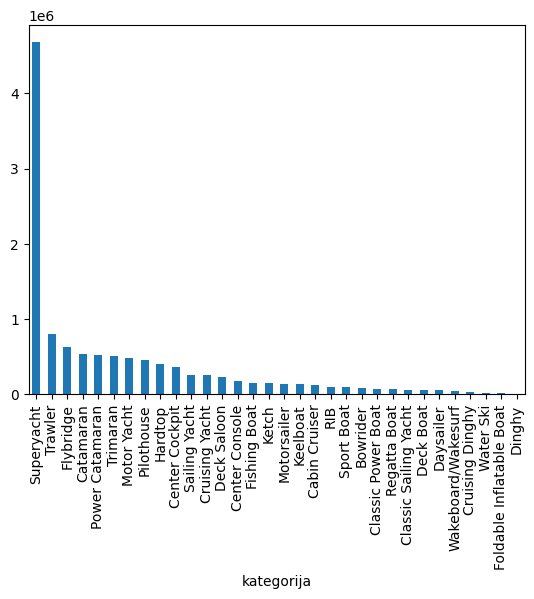

In [2]:
zdruzena.groupby("kategorija").mean(numeric_only=True).sort_values('cena', ascending=False).cena.plot.bar()

Kot pričakovano so podatki pokazali in potrdili 1. hipotezo, da so barke iz kategorije superjaht v povprečju najdražje.

In [3]:
import numpy as np
zdruzena['cena na kvadratni meter'] = (zdruzena['cena'] * 4) / (np.pi * zdruzena['dolzina'] * zdruzena['sirina'])
povprecne_cene_na_kvadratni_meter_na_kategorijo = zdruzena.groupby(["kategorija", "lokacija"]).mean(numeric_only=True).sort_values(['kategorija', 'cena na kvadratni meter'])['cena na kvadratni meter']
povprecne_cene_na_kvadratni_meter = zdruzena.groupby("lokacija").mean(numeric_only=True).sort_values('cena na kvadratni meter')['cena na kvadratni meter']
povprecne_cene_na_kvadratni_meter

lokacija
Croatia      6672.759914
Slovenia    10126.173820
Name: cena na kvadratni meter, dtype: float64

Podatki so pokazali, da dobimo na hrvaškem v povprečju "več barke za naš denar". V nadaljnjem bom to razmerje pogledal še za kategorije in letnice izdelave bark.

In [4]:
hrvaske_kategorije = zdruzena[zdruzena['lokacija'] == 'Croatia']['kategorija'].nunique()
vse_kategorije = zdruzena['kategorija'].nunique()
slovenske_kategorije = zdruzena[zdruzena['lokacija'] == 'Slovenia']['kategorija'].nunique()
print(
    f"Število vseh kategorij: {vse_kategorije}, število kategorij na voljo na Hrvaški: {hrvaske_kategorije},"
    f"število kategorij na voljo v Sloveniji: {slovenske_kategorije}."
    )

Število vseh kategorij: 32, število kategorij na voljo na Hrvaški: 31,število kategorij na voljo v Sloveniji: 14.


Zgornji podatki so pokazali, da vključitev hrvaškega trga ponuja veliko večjo izbiro kategorij, kot če bi se omejili le na slovenski trg.

In [5]:
povp_cene_kat = zdruzena.groupby(['lokacija', 'kategorija'])['cena na kvadratni meter'].mean(numeric_only=True)
razmerje_kat = povp_cene_kat['Slovenia']/povp_cene_kat['Croatia']
razmerje_kat.dropna()

kategorija
Cabin Cruiser     0.954301
Center Console    2.173528
Daysailer         0.888848
Flybridge         1.196569
Hardtop           1.119286
Motor Yacht       1.411420
Motorsailer       0.858622
Pilothouse        2.745460
RIB               1.095407
Regatta Boat      1.396334
Sailing Yacht     1.680533
Sport Boat        1.510818
Trawler           2.976946
Name: cena na kvadratni meter, dtype: float64

Za vsako izmed skupnih 13. kategorij sem izračunal razmerje med povprečno ceno barke na kvadratni meter v Sloveniji glede na Hrvaško. Če je razmerje manjše od 1 je ugodnejše povprečje v Sloveniji, sicer pa na Hrvaškem. Podatki so pokazali, da v Sloveniji dobimo v povprečju večjo površino barke za naš denar napram Hrvaški le pri treh kategoijah izmed 13 skupnih kategorij.

In [6]:
povp_cene_leto = zdruzena.groupby(['lokacija', 'leto'])['cena na kvadratni meter'].mean(numeric_only=True)
razmerje_leto = povp_cene_leto['Slovenia']/povp_cene_leto['Croatia']
hrvaska_boljse = razmerje_leto[razmerje_leto > 1].count()
slovenija_boljse = razmerje_leto[razmerje_leto < 1].count()
enaka_leta = razmerje_leto.dropna().count()
print(
    f"Če barke primerjamo po starosti, dobimo {enaka_leta} ujemanj, od katerih dobimo v {hrvaska_boljse} "
    f"primerih v povprečju boljšo ponudbo na Hrvaškem in v {slovenija_boljse} primerih pa v Sloveniji."
    )

Če barke primerjamo po starosti, dobimo 27 ujemanj, od katerih dobimo v 12 primerih v povprečju boljšo ponudbo na Hrvaškem in v 15 primerih pa v Sloveniji.


V kolikor primerjamo povprečne cene bark le po starosti, ugotovimo, da morda ni nujno, da dobimo na Hrvaškem boljše ponudbe in so bile lahko predhodne ugotovitve zavajujoče zaradi pomanjkljivih podatkov o starosti barke.

In [7]:
povp_cene = zdruzena.groupby(['lokacija', 'kategorija', 'leto'])['cena na kvadratni meter'].mean(numeric_only=True)
razmerje = povp_cene['Slovenia']/povp_cene['Croatia']
hrvaska = razmerje[razmerje > 1].count()
slovenija = razmerje[razmerje < 1].count()
enaka = razmerje.dropna().count()
print(
    f"Če barke primerjamo po starosti in kategoriji, dobimo {enaka} ujemanj, od katerih dobimo v {hrvaska} "
    f"primerih v povprečju boljšo ponudbo na Hrvaškem in v {slovenija} primerih pa v Sloveniji."
    )

Če barke primerjamo po starosti in kategoriji, dobimo 53 ujemanj, od katerih dobimo v 23 primerih v povprečju boljšo ponudbo na Hrvaškem in v 30 primerih pa v Sloveniji.


Primerjava bark glede na kategorijo in starost kaže, da 2. hipotezo, da so na Hrvaškem boljše ponudbe za barke ne moremo potrditi.

V nadeljevanju bom barke razvrstil v skupine glede na dolžino, širino in leto izdelave. Ker je to nemogoča naloga za prosto oko pri veliki količini podatkov bom, uporabil spodnji algoritem, ki nam bo izbral optimalno **hiearhično-združevalno razvrščanje v skupine** (angl. hierarchical agglomerative clustering, HAC).

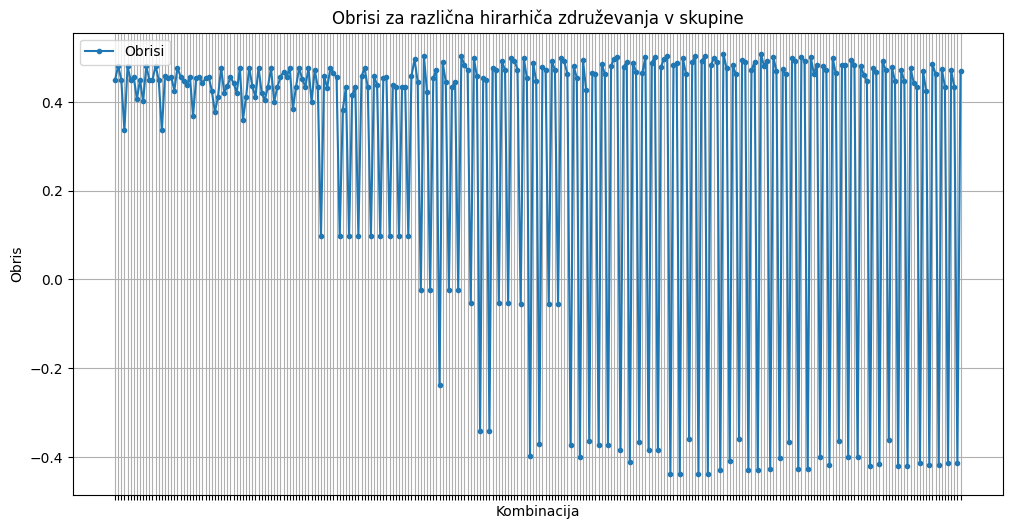

In [8]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

razvrscanje_bark = barke_brez_kategorij.iloc[:, [2, 3, 4]]
normalizirano = pd.DataFrame(normalize(razvrscanje_bark))

razdalje = [
    ['euclidean', 'ward'], ['euclidean', 'complete'], ['euclidean', 'single'], ['euclidean', 'average'],
    ['manhattan', 'complete'], ['manhattan', 'single'], ['manhattan', 'average'],
    ['chebyshev', 'complete'],  ['chebyshev', 'single'], ['chebyshev', 'average'],
    ['cosine', 'complete'], ['cosine', 'single'], ['cosine', 'average'],
    ['minkowski', 'complete'], ['minkowski', 'single'], ['minkowski', 'average']
    ]

min_st_skupin = 4
max_st_skupin = 20
norm_obrisi = []
for n_skupin in range(min_st_skupin, max_st_skupin + 1):
    for metric, linkage in razdalje:
        norm_zdruzevanje = AgglomerativeClustering(n_clusters=n_skupin, linkage=linkage, metric=metric)
        norm_oznake = norm_zdruzevanje.fit_predict(normalizirano)
        norm_povprecje_obrisa = silhouette_score(normalizirano, norm_oznake)
        norm_obrisi.append(norm_povprecje_obrisa)

kombinacije = []
komb = [
    'euclidean_ward', 'euclidean_complete', 'euclidean_single', 'euclidean_average',
    'manhattan_complete', 'manhattan_single', 'manhattan_average',
    'chebyshev_complete', 'chebyshev_single', 'chebyshev_average',
    'cosine_complete', 'cosine_single', 'cosine_average',
    'minkowski_complete', 'minkowski_single', 'minkowski_average'
    ]
for n in range(min_st_skupin, max_st_skupin + 1):
    for e in komb:
        e = e + f'_{n}'
        kombinacije.append(e)


plt.figure(figsize=(12, 6))
plt.tick_params(labelbottom = False)
plt.plot(kombinacije, norm_obrisi, marker='.', label='Obrisi')
plt.xlabel('Kombinacija')
plt.ylabel('Obris')
plt.title('Obrisi za različna hirarhiča združevanja v skupine')
plt.legend()
plt.grid(True)
plt.show()


Graf nam prikazuje, kako velike razlike so lahko med obrisi izbiranih mer razdalje in številom skupin. Zato je še toliko bolj pomembno, da preverimo in izberemo najboljši način za razvrščanje v skupine. **Obris** (angl. silhouette) je metoda za vrednotenje kvalitete ali doslednosti razvrščanja objektov v skupine. Za vsak objekt izmeri, kako podoben je objektom, ki pripadajo isti skupini (povezanost) in kako različen je objektom iz drugih skupin (ločevanje).

In [9]:
opti = np.argmax(norm_obrisi)
optimalna_izbira = kombinacije[opti].split('_')
opt_linkage = optimalna_izbira[1]
opt_metric = optimalna_izbira[0]
opt_st_skupin = int(optimalna_izbira[2])
print(
    f"V našem primeru je največji možen obris {norm_obrisi[opti]} dosežen s kombinacijo mere razdalje"
    f"med objekti in skupinami {opt_linkage, opt_metric} in "
    f"optimalnim število skupin {opt_st_skupin}."
)

V našem primeru je največji možen obris 0.5087015152332095 dosežen s kombinacijo mere razdaljemed objekti in skupinami ('average', 'euclidean') in optimalnim število skupin 16.


In [10]:
skupine = AgglomerativeClustering(n_clusters=opt_st_skupin, metric=opt_metric, linkage=opt_linkage).fit_predict(normalizirano)

barke_brez_kategorij['skupina'] = skupine
barke_brez_kategorij['cena na kvadratni meter'] = (barke_brez_kategorij['cena'] * 4) / (np.pi * barke_brez_kategorij['dolzina'] * barke_brez_kategorij['sirina'])
barke_brez_kategorij.sort_values('cena na kvadratni meter')

,id,ime,dolzina,sirina,leto,uporabljenost,cena,lokacija,skupina,cena na kvadratni meter
1019,552446,Rinker V190,7.00,2.60,1990,Used Boat,5500,Croatia,12,384.770192
921,507247,Sparkman & Stephens 6.6,9.10,2.85,1971,Used Boat,8000,Croatia,6,392.747883
765,447706,Hucky Ketch 37,10.86,3.45,2013,Used Boat,11800,Croatia,2,400.998922
1062,548807,Zodiac Cadet RIB compact 250,2.50,1.56,2019,Used Boat,1500,Croatia,5,489.707517
471,516559,Sammler,13.40,3.40,2005,Used Boat,19000,Croatia,7,530.982251
...,...,...,...,...,...,...,...,...,...,...
19,499999,Azimut 27 Grande,26.78,6.59,2018,Used Boat,5700000,Croatia,3,41123.397441
16,549371,Azimut Grande 27 Metri,27.00,6.59,2020,Used Boat,5900000,Croatia,3,42219.486955
1,534942,ISA Yachts Isa 120 Sport,36.45,7.40,2017,Used Boat,9500000,Croatia,8,44844.013180
37,537309,Absolute Navetta 75,22.82,5.61,2024,New Boat on Order,4618370,Croatia,13,45932.527181


V zgornji tabeli bark brez kategorij sta dodana stolpca, ki nam povesta v katero izmed 16. skupin spada plovilo in koliko je cena na kvadratni meter, če bi privzeli, da je barka v obliki elipse. Če primerjamo s cenami stanovanj v Sloveniji, lahko vidimo, da je pri barkah veliko večji razpon pri ceni na kvadratni meter. Prav tako opazimo, da lahko dobimo barke s primerno kvadraturo za bivanje po veliko ugodnejši ceni kot pa stanovanja. Tako lahko hipotezi 3 in 4 potrdimo. Pred odločitvijo o življenju na barki pa se je potrebno zavedati, da sta privez in vzdrževanja barke veliko dražja kot je vzdrževanje stanovanja.

In [11]:
st_prikazanih_bark_na_skupino = 3
for i in range(opt_st_skupin):
    print(barke_brez_kategorij[barke_brez_kategorij.skupina == i].sort_values('cena').head(st_prikazanih_bark_na_skupino))

         id           ime  dolzina  sirina  leto uporabljenost    cena  \
91   550004    Canados 70    20.00    4.65  1984     Used Boat  120000   
136  552477  Ferretti 592    18.33    5.25  1995     Used Boat  134000   
117  525116      Astor 59    18.90    4.90  1991     Used Boat  139000   

    lokacija  skupina  cena na kvadratni meter  
91   Croatia        0              1642.889735  
136  Croatia        0              1772.936368  
117  Croatia        0              1911.027931  
        id                   ime  dolzina  sirina  leto uporabljenost    cena  \
35  538751           Elegance 76     23.0     5.7  2002     Used Boat  590000   
36  543047  Elegance New Line 76     23.0     5.7  2002     Used Boat  660000   
22  531499         Sanlorenzo 82     25.0     6.0  2000     Used Boat  749000   

   lokacija  skupina  cena na kvadratni meter  
35  Croatia        1              5730.063550  
36  Croatia        1              6409.901598  
22  Croatia        1              6357

Tabela prikazuje 3 najcenejše barke (v kolikor ima skupina več kot 3 barke, sicer so prikazane vse barke v skupini) iz vsake izmed 16. skupin. Kot že rečeno, sem barke združili v skupine glede na dolžino, širino in starost. To so poleg ohranjenosti najpomembnejši podatki za določanje cene barke, zato bi morala plovila v isti skupini imeti podobno vrednost. Tako sem z izbiro le 3 najcenejših iz vsake skupine občutno zmanjšali količino bark, ki jih moremo pregledati, da bi dobili le najugodnejše ponudbe za nakup.

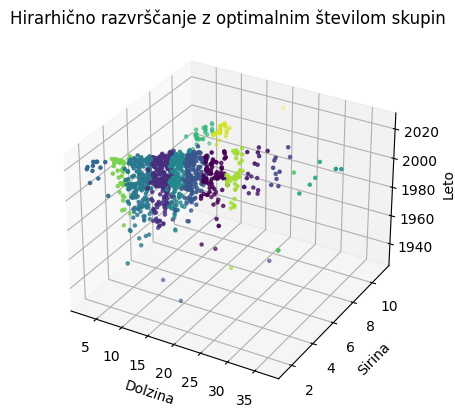

In [12]:
risba = plt.figure()
os = risba.add_subplot(projection='3d')
os.scatter(razvrscanje_bark.iloc[:, 0], razvrscanje_bark.iloc[:, 1], razvrscanje_bark.iloc[:, 2], c=skupine, marker =".")
os.set_xlabel('Dolzina')
os.set_ylabel('Sirina')
os.set_zlabel('Leto', rotation=90)
os.set_title('Hirarhično razvrščanje z optimalnim številom skupin')
plt.show()

Zgornji graf prikaže, kako so barke razporejene v skupine glede na uporabljeni algoritem za razvrščanje v skupine 

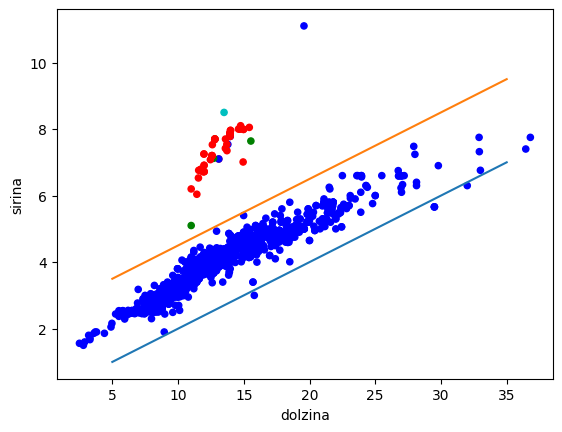

In [13]:
barva = []
for i in zdruzena['kategorija']:
    if i == 'Power Catamaran':
        barva.append('g')
    elif i == 'Catamaran':
        barva.append('r')
    elif i == 'Trimaran':
        barva.append('c')
    else:
        barva.append('b')

zdruzena.plot.scatter(x='dolzina', y='sirina', c=barva)
plt.plot([5, 35], [1, 7])
plt.plot([5, 35], [3.5, 9.5])

V grafu sem drugačno barvo od modre pobarval le barke, ki spadajo v kategoriji katamaran in trimaran (kategorije v tabeli zapisane kot Catamaran, Power Catamaran in Trimaran). Tako je iz grafa razvidno, da se večina bark nahaja med premico s funkcijo y = x/5 in y = x/5 + 2.5. Večina izjem pričakovano spada med katamarane in trimarane. In s tem je 5. hipoteza potrjena.

## Zaključek

Z analizo sem potrdili 4 od 5 hipotez in izdelali sistem za lažje iskanja plovil, najprimernejših za nakup.

Drugo hipotezo, ki edina ni potrjena, sem postavil na podlagi predpostavke, da je življenski standard na Hrvaškem nižji, hkrati pa je bistveno večja ponudba plovil kot v Sloveniji, s tem pa tudi večja možnost za ugodno ponudbo za nakup plovila. Življenski standard verjeto ne vpliva veliko, saj tudi avtomobili, če odštejemo davke, dosegajo podobne cene ne glede na življenski standard v državi. Prav tako pa je na Hrvaškem večje zanimanje po plovilih, saj imajo veliko več morja, kar posledično dviguje ceno.

Pri razvrščanju plovil v skupine bi bilo koristno upoštevati tudi ohranjenost plovila, ki ima velik vpliv na ceno in so zato pogosto najcenejša plovila potrebna več popravil.